In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arp-spoofing-based-mitm-attack-dataset/iot_intrusion_MITM_ARP_labeled_data.csv
/kaggle/input/arp-spoofing-based-mitm-attack-dataset/UQ_MITM_ARP_labeled_data.csv
/kaggle/input/arp-spoofing-based-mitm-attack-dataset/CIC_MITM_ArpSpoofing_All_Labelled.csv
/kaggle/input/arp-spoofing-based-mitm-attack-dataset/GIT_arpspoofLabelledData.csv
/kaggle/input/arp-spoofing-based-mitm-attack-dataset/All_Labelled.csv


In [2]:
import pandas as pd

file_path = f"/kaggle/input/arp-spoofing-based-mitm-attack-dataset/All_Labelled.csv"  # Replace 'filename.csv' with the actual file name
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,src_port,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Label
0,56343,443,6,4,0,0,1.666040e+12,1.666040e+12,904,20,...,TLS,Web,0,6,apicom.netatmo.net,bb32cf215dd58fdee6573e65933e6c55,NaN,NaN,NaN,normal
1,0,0,2,4,0,0,1.666040e+12,1.666040e+12,231,2,...,IGMP,Network,0,6,apicom.netatmo.net,bb32cf215dd58fdee6573e65933e6c55,NaN,NaN,NaN,normal
2,43586,443,6,4,0,0,1.666040e+12,1.666040e+12,40,3,...,TLS,Web,0,6,apicom.netatmo.net,bb32cf215dd58fdee6573e65933e6c55,NaN,NaN,NaN,normal
3,5353,5353,17,4,0,0,1.666040e+12,1.666040e+12,0,1,...,MDNS,Network,0,6,amazon-c1a898e49-mshome-net.local,bb32cf215dd58fdee6573e65933e6c55,NaN,NaN,NaN,normal
4,0,0,1,4,0,0,1.666040e+12,1.666040e+12,0,1,...,ICMP,Network,0,6,amazon-c1a898e49-mshome-net.local,bb32cf215dd58fdee6573e65933e6c55,NaN,NaN,NaN,arp_spoofing


In [8]:
df.shape

(74343, 79)

In [10]:
df.columns

Index(['src_port', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms',

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74343 entries, 0 to 74342
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   src_port                      74343 non-null  int64  
 1   dst_port                      74343 non-null  int64  
 2   protocol                      74343 non-null  int64  
 3   ip_version                    74343 non-null  int64  
 4   vlan_id                       74343 non-null  int64  
 5   tunnel_id                     74343 non-null  int64  
 6   bidirectional_first_seen_ms   74343 non-null  float64
 7   bidirectional_last_seen_ms    74343 non-null  float64
 8   bidirectional_duration_ms     74343 non-null  int64  
 9   bidirectional_packets         74343 non-null  int64  
 10  bidirectional_bytes           74343 non-null  int64  
 11  src2dst_first_seen_ms         74343 non-null  float64
 12  src2dst_last_seen_ms          74343 non-null  float64
 13  s

In [6]:
df.describe()

,src_port,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_packets,...,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_is_guessed,application_confidence
count,74343.000000,74343.000000,74343.000000,74343.000000,74343.0,74343.000000,7.434300e+04,7.434300e+04,74343.000000,74343.000000,...,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000,74343.000000
mean,29833.401894,17009.260226,14.542795,4.034220,0.0,0.000121,1.656821e+12,1.656821e+12,28896.468235,43.696407,...,0.149994,0.002569,0.024777,0.000188,15.506652,6.253554,0.024051,0.101274,0.057975,4.738039
std,23205.356712,21490.473975,6.841230,0.259364,0.0,0.019057,9.684270e+10,9.684270e+10,78075.477300,1818.194699,...,0.505870,0.159383,0.236279,0.023195,800.642332,608.247890,0.268488,0.371073,0.233697,2.384699
min,0.000000,0.000000,1.000000,4.000000,0.0,0.000000,1.752000e+04,1.752200e+04,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,53.000000,17.000000,4.000000,0.0,0.000000,1.666100e+12,1.666100e+12,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,36733.000000,1341.000000,17.000000,4.000000,0.0,0.000000,1.666110e+12,1.666110e+12,38.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,51559.500000,35818.000000,17.000000,4.000000,0.0,0.000000,1.666120e+12,1.666120e+12,1838.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,65533.000000,65530.000000,241.000000,6.000000,0.0,3.000000,1.666130e+12,1.666130e+12,598938.000000,441641.000000,...,11.000000,27.000000,8.000000,5.000000,195072.000000,159973.000000,28.000000,20.000000,1.000000,6.000000


In [11]:
print(df.isnull().sum())

src_port                0
dst_port                0
protocol                0
ip_version              0
vlan_id                 0
                     ... 
client_fingerprint      0
server_fingerprint      7
user_agent            218
content_type          218
Label                   0
Length: 79, dtype: int64


In [12]:
print(df["Label"].value_counts())  # Count of each label
print(df["Label"].value_counts(normalize=True) * 100)  # Percentage distribution


Label
normal          39551
arp_spoofing    34792
Name: count, dtype: int64
Label
normal          53.200705
arp_spoofing    46.799295
Name: proportion, dtype: float64


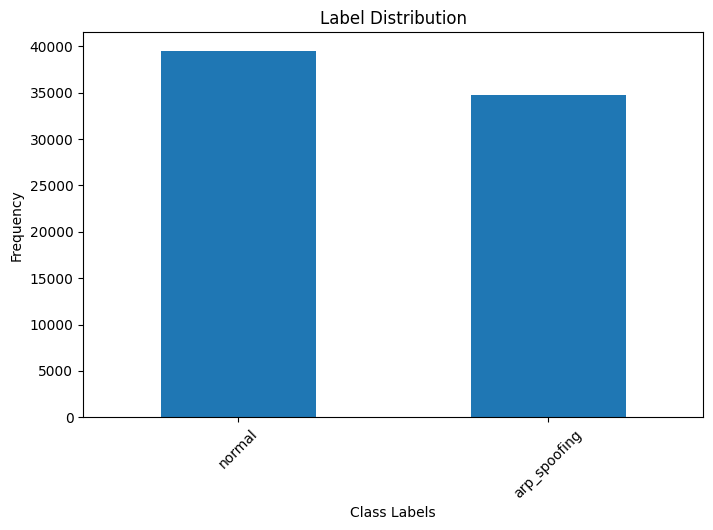

In [13]:
import matplotlib.pyplot as plt

label_counts = df["Label"].value_counts()

plt.figure(figsize=(8, 5))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [15]:
cols_to_drop = [
    'vlan_id', 'tunnel_id', 
    'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms',
    'src2dst_first_seen_ms', 'src2dst_last_seen_ms',
    'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
    'application_name', 'application_category_name', 
    'application_is_guessed', 'application_confidence',
    'requested_server_name', 'client_fingerprint', 
    'server_fingerprint', 'user_agent', 'content_type'
]

df_cleaned = df.drop(columns=cols_to_drop)

In [16]:
df_cleaned.columns

Index(['src_port', 'dst_port', 'protocol', 'ip_version',
       'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_duration_ms', 'dst2src_packets',
       'dst2src_bytes', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms', 'src2dst_max_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets',
       'bidirectional_cwr_packets', 'bidirectional_ece_packets',

🔹 Accuracy: 0.9474

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      6959
           1       0.94      0.96      0.95      7910

    accuracy                           0.95     14869
   macro avg       0.95      0.95      0.95     14869
weighted avg       0.95      0.95      0.95     14869



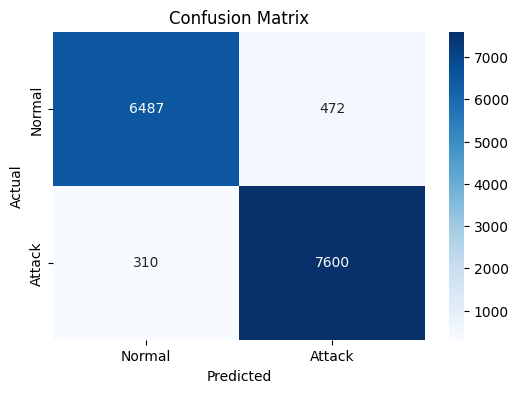

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 🔹 Separate features & labels
X = df_cleaned.drop(columns=["Label"])  # Features
y = df_cleaned["Label"]  # Target variable

# 🔹 Convert label to binary encoding if needed (e.g., "Normal" -> 0, "Attack" -> 1)
label_encoder = LabelEncoder()
if y.dtype == "object":
    y = label_encoder.fit_transform(y)

# 🔹 Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = clf.predict(X_test)

# 🔹 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


🔹 Accuracy: 0.9499

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6959
           1       0.94      0.96      0.95      7910

    accuracy                           0.95     14869
   macro avg       0.95      0.95      0.95     14869
weighted avg       0.95      0.95      0.95     14869



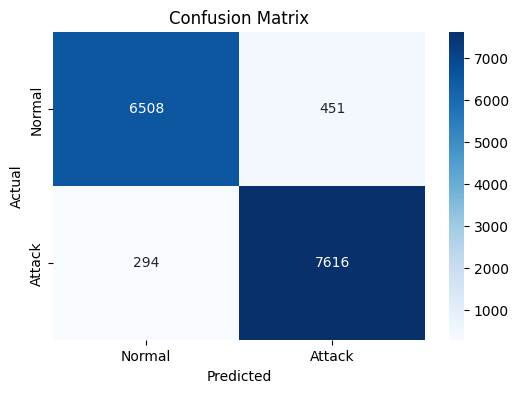

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Select only the relevant columns (mapped equivalents)
selected_columns = {
    'src_port': 'id.orig_p',
    'dst_port': 'id.resp_p',
    'protocol': 'proto',
    'application_name': 'service',
    'bidirectional_duration_ms': 'duration',
    'src2dst_bytes': 'orig_bytes',
    'dst2src_bytes': 'resp_bytes',
    'bidirectional_syn_packets': 'conn_state',
    'bidirectional_ack_packets': 'history',
    'src2dst_packets': 'orig_pkts',
    'src2dst_bytes': 'orig_ip_bytes',
    'dst2src_packets': 'resp_pkts',
    'dst2src_bytes': 'resp_ip_bytes',
    'Label': 'label'
}

# 🔹 Rename columns to match original dataset structure
df_selected = df[list(selected_columns.keys())].rename(columns=selected_columns)

# 🔹 Handle missing values (if any)
df_selected = df_selected.dropna()

# 🔹 Encode categorical features if necessary
label_encoder = LabelEncoder()
if df_selected["service"].dtype == "object":
    df_selected["service"] = label_encoder.fit_transform(df_selected["service"])

# 🔹 Encode target variable
if df_selected["label"].dtype == "object":
    df_selected["label"] = label_encoder.fit_transform(df_selected["label"])

# 🔹 Separate features & labels
X = df_selected.drop(columns=["label"])
y = df_selected["label"]

# 🔹 Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = clf.predict(X_test)

# 🔹 Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
